# K-Nearest Neighbour

## Objective: Using the breast cancer dataset from the sklearn library, predict whether a cancer case is malignant or benign

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

# Sklearn related imports
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Step 1: Lets load the breast cancer data

In [15]:
breast_cancer = datasets.load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


We have 30 columns of data on which a decision of whether breast cancer cells are malignant or benign is decided <br/>

To make things easier, we will take two of these columns and understand KNN through that!

In [16]:
X = X[['mean area', 'mean compactness']]
X.head(10)

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280
5,477.1,0.17000
6,1040.0,0.10900
7,577.9,0.16450
8,519.8,0.19320
9,475.9,0.23960


### Step 2: EDA and Data Preprocessing

In [17]:
# Encoding the target into 0 and 1
# 1 - indicates benign
# 0 - indicates malignant

y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [39]:
# Adding y to the dataframe to make EDA easier

X['benign'] = y
X.head(10)

,mean area,mean compactness,benign
0,1001.0,0.27760,0
1,1326.0,0.07864,0
2,1203.0,0.15990,0
3,386.1,0.28390,0
4,1297.0,0.13280,0
5,477.1,0.17000,0
6,1040.0,0.10900,0
7,577.9,0.16450,0
8,519.8,0.19320,0
9,475.9,0.23960,0


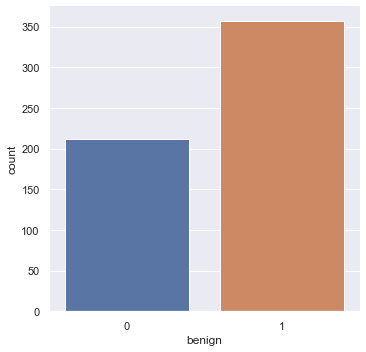

In [35]:
# Benign vs Non Benign (Malignant Cases)

sns.factorplot("benign", data = X, kind="count");

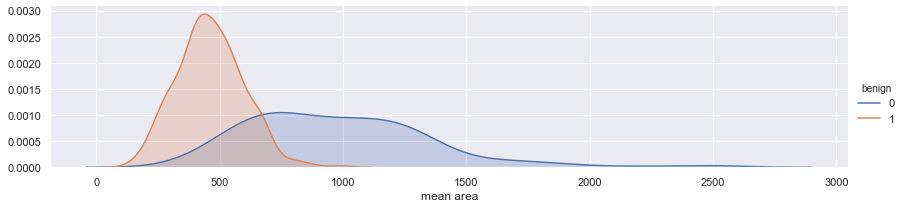

In [32]:
# Exploring the spread of mean area for different cases
fig = sns.FacetGrid(X, hue="benign", aspect=4)
fig.map(sns.kdeplot, "mean area", shade=True)
fig.add_legend()

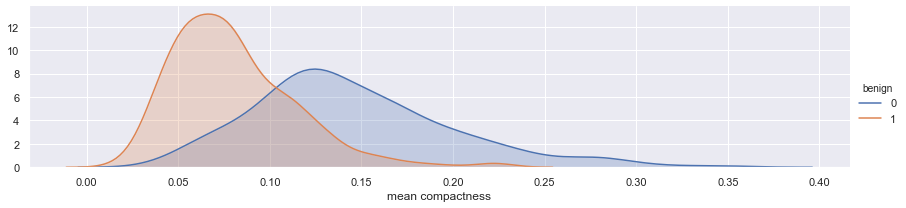

In [33]:
# Exploring the spread of mean compactness for different cases
fig = sns.FacetGrid(X, hue="benign", aspect=4)
fig.map(sns.kdeplot, "mean compactness", shade=True)
fig.add_legend()

### Step 3: Training the model

In [40]:
# Splitting the data into training and testing sets

X = X.drop('benign', axis=1) # Dropping what we added in earlier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# What is the default value of test size?

In [ ]:
# Training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

### Step 4: Testing the model

In [45]:
# Predicting on the test set
y_pred = knn.predict(X_test)

### Step 5: Evaluating the metrics

Text(30.5, 0.5, 'Actual')

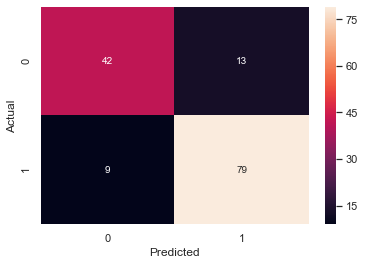

In [47]:
# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

1) Can you try conputing the accuracy of the model? <br/>
2) Do you think accuracy is the right metric? If not which one is a correct metric? Using Python functions try to find the value of that metric

### End of Notebook